# LESSON 1 - Source and Sink Flows

## Plotting Streamline for a Source Flow

In [4]:
#importing the libraries
import math
import numpy as np
from matplotlib import pyplot
%matplotlib inline

In [5]:
x_start, x_end = -2.0, 2.0
y_start, y_end =-1.0, 1.0
n = 50 #number of points in the grid
x = np.linspace(x_start, x_end, n)
y = np.linspace(y_start, y_end, n)

X, Y = np.meshgrid(x, y)

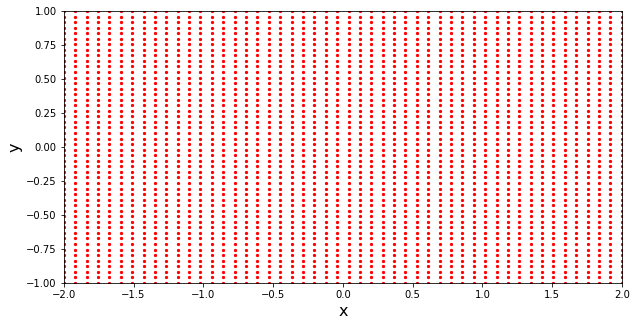

In [6]:
width = 10
height = (y_end-y_start)/(x_end-x_start) * width

pyplot.figure(figsize = (width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.scatter(X, Y, s=5, color='red', marker='o');

In [25]:
source_strength = 5.0
x_source, y_source = -1.0, 0.0

u_source = source_strength/(2*math.pi)*(X-x_source)/((X-x_source)**2 + (Y-y_source)**2)
v_source = source_strength/(2*math.pi)*(Y-y_source)/((X-x_source)**2 + (Y-y_source)**2)

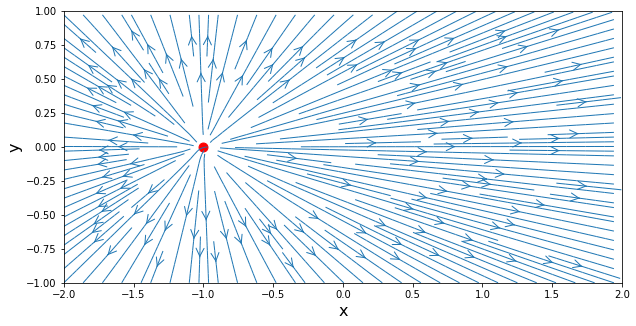

In [26]:
#plotting the streamlines

pyplot.figure(figsize = (width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)

pyplot.streamplot(X, Y, u_source, v_source, density=2, linewidth=1, arrowsize=2, arrowstyle='->');
pyplot.scatter(x_source, y_source, color='red', s=80);

## Plotting Streamlines for a Sink

In [27]:
sink_strength = -5.0                     # strength of the sink
x_sink, y_sink = 1.0, 0.0                # location of the sink

# compute the velocity on the mesh grid
u_sink = (sink_strength / (2 * math.pi) *
          (X - x_sink) / ((X - x_sink)**2 + (Y - y_sink)**2))
v_sink = (sink_strength / (2 * math.pi) *
          (Y - y_sink) / ((X - x_sink)**2 + (Y - y_sink)**2))

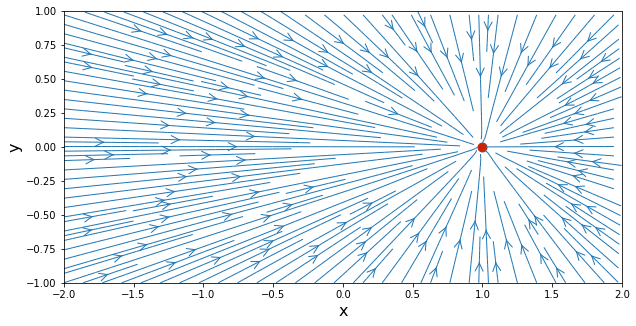

In [28]:
# plotting the streamlines

width = 10.0
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u_sink, v_sink, density=2, linewidth=1, arrowsize=2, arrowstyle='->')
pyplot.scatter(x_sink, y_sink, color='#CD2305', s=80);

## Source and Sink Pair

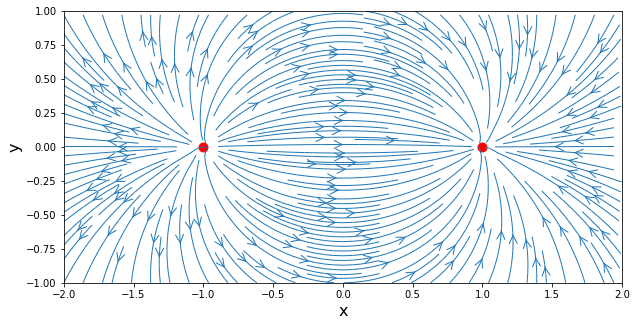

In [29]:
# compute the velocity of the pair source/sink by superposition

u_pair = u_source + u_sink
v_pair = v_source + v_sink

# plot the streamlines of the pair source/sink

pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u_pair, v_pair, density=2.0, linewidth=1, arrowsize=2, arrowstyle='->')
pyplot.scatter([x_source, x_sink], [y_source, y_sink], color='red', s=80);

## Plotting Potential Lines

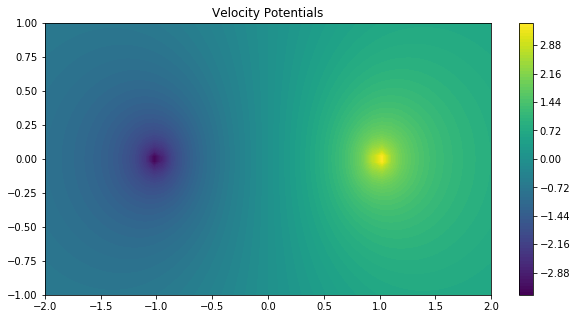

In [60]:
import scipy

phi_source = (source_strength / (4*math.pi)) * np.log((X-x_source)**2 + (Y-y_source)**2)
phi_sink = (sink_strength / (4*math.pi)) * np.log((X-x_sink)**2 + (Y-y_sink)**2)

phi = phi_source + phi_sink
pyplot.figure(figsize=(10.0, 5.0))
pyplot.title('Velocity Potentials')
pyplot.contourf(X, Y, phi, 100)
pyplot.colorbar(extend='both')